<a href="https://colab.research.google.com/github/fell100/Machine-Learning/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessamento de dados e Visualização

In [115]:
import pandas as pd

In [116]:
import numpy as np


In [117]:
import plotly.express as px

In [118]:
import matplotlib.pyplot as plt


In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
import seaborn as sns

In [121]:
from google.colab import drive

In [122]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [123]:
base_credit = pd.read_csv('/content/gdrive/MyDrive/datasets/credit_risk_dataset.csv')

In [124]:
base_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Uma análise prévia da base de dados


In [125]:
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Buscando na base de dados a pessoa com a maior renda

In [126]:
base_credit[base_credit['person_income'] >= 6.000000e+06]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [127]:
base_credit[base_credit['loan_amnt'] <= 500.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
871,26,19500,RENT,0.0,MEDICAL,C,500,11.41,0,0.03,N,2
1355,22,26000,MORTGAGE,3.0,PERSONAL,B,500,10.46,0,0.02,N,4
8607,26,59000,MORTGAGE,7.0,HOMEIMPROVEMENT,B,500,9.76,0,0.01,N,2
15951,26,7904,MORTGAGE,0.0,HOMEIMPROVEMENT,B,500,10.71,0,0.06,N,3
18502,33,18000,RENT,0.0,DEBTCONSOLIDATION,A,500,NaN,0,0.03,N,6


In [128]:
np.unique(base_credit['loan_status'], return_counts = True)

(array([0, 1]), array([25473,  7108]))

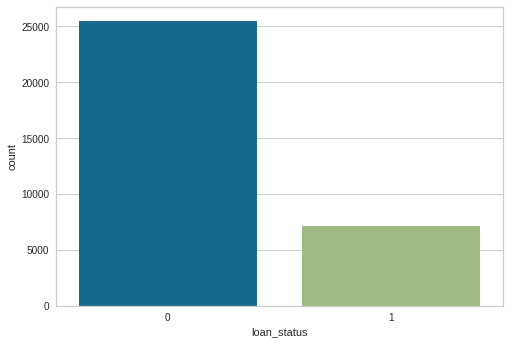

In [129]:
sns.countplot(x = base_credit['loan_status']);

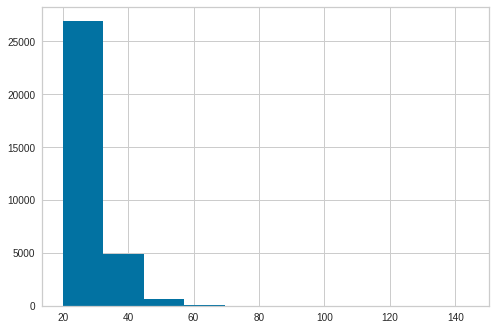

In [130]:
plt.hist(x = base_credit['person_age']);

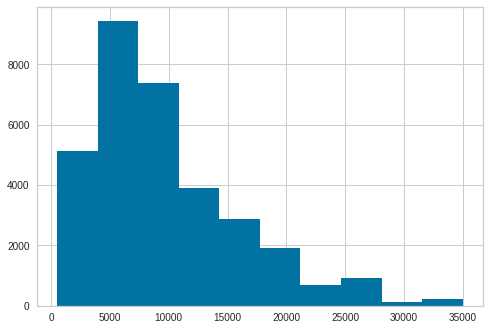

In [131]:
plt.hist(x = base_credit['loan_amnt']);

In [132]:
grafico = px.scatter_matrix(base_credit, dimensions = ['person_age', 'person_income', 'loan_amnt'], color = 'loan_status')
grafico.show()

Tratamento de valores inconsistentes

In [133]:
base_credit.loc[base_credit['person_age'] > 90]
# ou também:
# base_credit[base_credit['person_age'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27


In [134]:
# apaga a coluna inteira da base de dados
base_credit2 = base_credit.drop('person_age', axis= 1) #axis = 1 para coluna, = 0 para linha
base_credit2

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [135]:
# apagar apenas os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['person_age'] > 100].index)
base_credit3

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [136]:
base_credit.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

In [137]:
base_credit['person_age'].mean()

27.73459992019889

In [138]:
base_credit['person_age'][base_credit['person_age'] < 100].mean()

27.718043958742633

In [139]:
# alteramos os dados inconsistentes para a media das idades
base_credit.loc[base_credit['person_age'] > 100, 'person_age'] = 27.71

In [140]:
#retiramos os dados inconsistentes
base_credit.loc[base_credit['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [141]:
# Tratando dados faltantes
base_credit.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [142]:
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [143]:
base_credit.loc[pd.isnull(base_credit['person_emp_length'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22.0,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24.0,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24.0,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25.0,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22.0,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38.0,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51.0,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70.0,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56.0,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [144]:
base_credit['person_emp_length'].fillna(base_credit['person_emp_length'].mean(), inplace = True)

In [145]:
base_credit.loc[pd.isnull(base_credit['loan_int_rate'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23.0,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24.0,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23.0,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24.0,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26.0,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53.0,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65.0,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54.0,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51.0,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [146]:
base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean(), inplace = True)

In [147]:
# variaveis previsoras 'X' e classificadoras 'Y'

#loc é label based
#iloc int position based
#                       : para todas linhas , loc ['colunas desejadas']
x_credit = base_credit.loc[:, ['person_income', 'person_age',  'loan_amnt']].values
x_credit

array([[5.900e+04, 2.200e+01, 3.500e+04],
       [9.600e+03, 2.100e+01, 1.000e+03],
       [9.600e+03, 2.500e+01, 5.500e+03],
       ...,
       [7.600e+04, 6.500e+01, 3.500e+04],
       [1.500e+05, 5.600e+01, 1.500e+04],
       [4.200e+04, 6.600e+01, 6.475e+03]])

In [148]:
type(x_credit)

numpy.ndarray

In [149]:
y_credit = base_credit.iloc[:, 8]
y_credit

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [150]:
x_credit[:,1].min( )

20.0

  Escalonamento:

  Padronização (Standardisation)

  x = ( x - média(x) ) / desvio padrão (x)

  Normalização ( Normalization )

  x = (x - min(x)) / ( max(x) - min(x) )

In [151]:
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [152]:
x_credit

array([[-0.11414329, -0.92160821,  4.01940376],
       [-0.91114671, -1.08278368, -1.35864998],
       [-0.91114671, -0.43808181, -0.64684875],
       ...,
       [ 0.16012914,  6.0089369 ,  4.01940376],
       [ 1.35402091,  4.55835769,  0.85584274],
       [-0.38841572,  6.17011237, -0.49262515]])

Dataset dados do censo

---




In [153]:
base_census = pd.read_csv('/content/gdrive/MyDrive/datasets/census.csv')

In [154]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [155]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [156]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

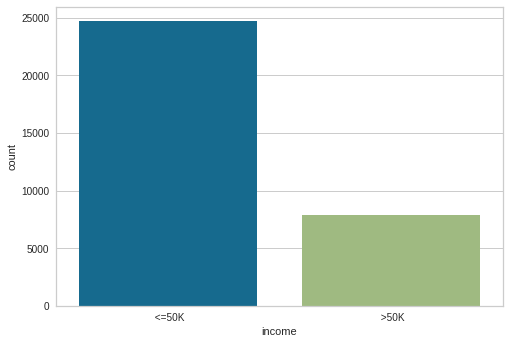

In [157]:
sns.countplot(x = base_census['income']);

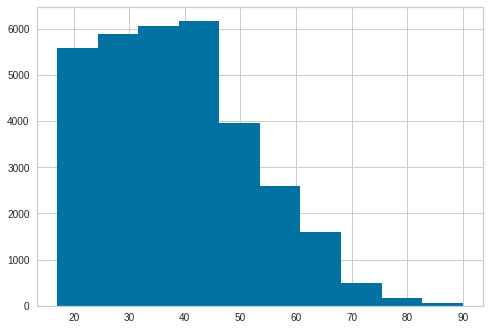

In [158]:
plt.hist(x = base_census['age']);

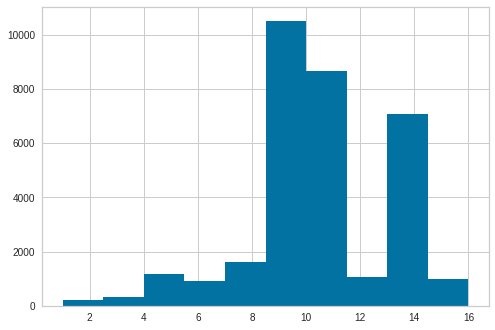

In [159]:
plt.hist(x = base_census['education-num']);

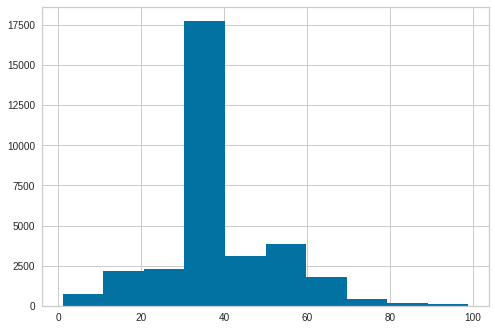

In [160]:
plt.hist(x = base_census['hour-per-week']);

In [161]:
#!pip install --upgrade plotly

In [162]:
#!pip freeze | grep "plotly"

In [163]:
#grafico = px.treemap(base_census, path=['workclass', 'age'])
#grafico.show()

In [164]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'], color='hour-per-week')
grafico.show()

In [165]:
# variavel x dos previsores
x_census = base_census.iloc[:, 0:14].values

In [166]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [167]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [168]:
# variavel y classificadora
y_census = base_census.iloc[:, 14].values

In [169]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [170]:
# tratando atributos categóricos do tipo string LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [171]:
label_encoder_teste = LabelEncoder()

In [172]:
#Fit transform, torna os atributos categóricos em numeros, preparando para o processamento
teste = label_encoder_teste.fit_transform(x_census[:,1])

In [173]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [174]:
# criando LabelEncoder para todas os atributos categóricos da database
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [175]:
# usando fit transform em cada atributo para tornalos numéricos
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3])
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:, 5])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:, 7])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:, 13])

In [176]:
np.unique(base_census['workclass'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

Label encoder --> transformação de atributos categóricos simples --> OneHotEncoder

In [177]:
#para não atribuir pesos diferentes para atributos categóricos
#utilizamos oneHotEnconder para criar uma matriz a partir de cada coluna
#de dados categóricos, tornando os pesos iguais
#exemplo: na coluna workclass temos 9 atributos categóricos diferentes, 
#assim com OneHotEncoder, teriamos uma matriz para essa coluna e o primeiro
#atributo se transformaria em 1 0 0 0 0 0 0 0, formando assim uma matriz 9x9

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [178]:
# utilizamos o columnTransformer, para alterar as colunas desejadas aplicando
# OneHotEncoder, e com o remainder 'passthrought' para alterar os valores
# e não apaga-los
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [179]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [180]:
x_census.shape

(32561, 108)

In [181]:
#Escalonamento dos valores
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [182]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
#dividindo as bases de dados em treinamento e teste
# Credit data

x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [185]:
# bases de dados separadas: 25% para teste, 75% para treinamento
x_credit_treinamento.shape, x_credit_teste.shape

((24435, 3), (8146, 3))

In [186]:
#dividindo as bases de dados teste e treinamento, agora para o censo
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0 )

In [187]:
x_census_treinamento.shape, x_census_teste.shape

((27676, 108), (4885, 108))

In [188]:
import pickle

In [189]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste], f)

In [190]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste], f)

# Naive Bayes


In [ ]:
# base risco credito 
base_risco_credito = pd.read_csv('/content/gdrive/MyDrive/datasets/risco_credito.csv')

In [ ]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
x_risco_credito = base_risco_credito.iloc[:, 0:4].values

In [ ]:
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# historia boa (0) -- divida alta (0) -- garantias nenhuma (1) -- renda > 35 (2) 
# historia ruim (2) -- divida alta (0) -- garantias adequada (0) -- renda < 15 (0)

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

Naive Bayes para a base de credito

In [ ]:
with open('/content/gdrive/MyDrive/datasets/credit.pkl', 'rb') as f:
  x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((24435, 3), (24435,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((8146, 3), (8146,))

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [ ]:
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_credit_teste


2124     0
252      0
13083    0
12447    0
31009    0
        ..
1438     1
28083    0
22127    0
10487    0
709      1
Name: loan_status, Length: 8146, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.8005155904738522

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[6349,  133],
       [1492,  172]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

Confusion matrix  



In [ ]:
#   _________________________________
#   |True Positive  | False Negative|
#   |---------------|---------------|
#   |False Positive | True Negative |
#   ---------------------------------


0.8005155904738522

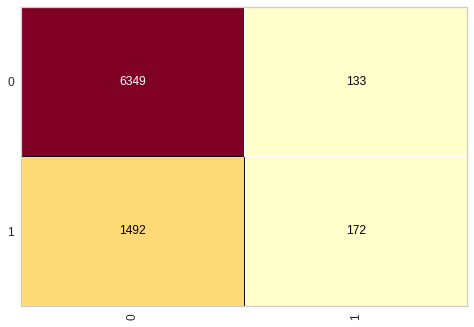

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
# Classification report:
# Precision:
# TP / (TP + FP)
# Recall:
# TP / (TP + FN)
# F1-Score:
# Harmonic mean of the recall (sensitivity)
# 2TP / (2TP + FP + FN)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6482
           1       0.56      0.10      0.17      1664

    accuracy                           0.80      8146
   macro avg       0.69      0.54      0.53      8146
weighted avg       0.76      0.80      0.74      8146



Base Census

In [ ]:
with open('/content/gdrive/MyDrive/datasets/census.pkl', 'rb') as f:
  x_census_treinamento, x_census_teste, y_census_treinamento,  y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
type(y_census_treinamento)

numpy.ndarray

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
accuracy_score(y_census_teste, previsoes)
# Nota-se o accuracy merda:

0.4767656090071648

0.4767656090071648

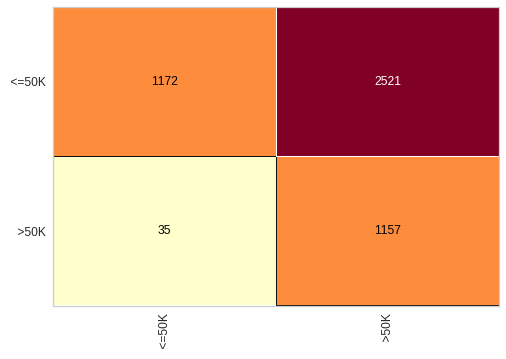

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Árvores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

[Text(0.5555555555555556, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.3333333333333333, 0.75, 'historia <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.2222222222222222, 0.5833333333333334, 'renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3333333333333333, 0.4166666666666667, 'divida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(0.2222222222222222, 0.25, 'historia <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.1111111111111111, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.4444444444444444, 0.25, 'entropy = 0.0\nsample

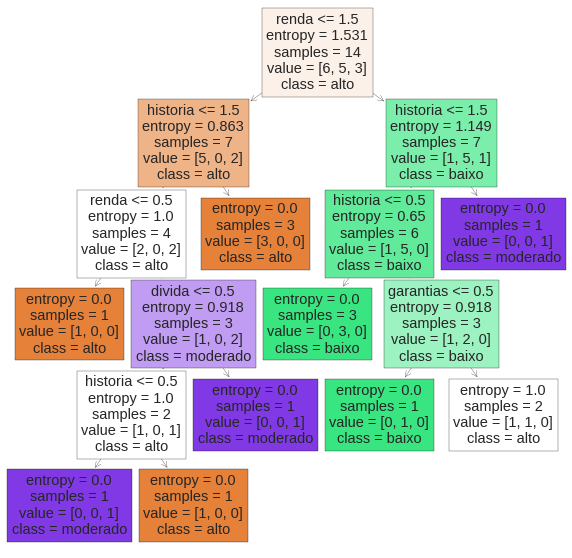

In [ ]:
from sklearn import tree


previsores = ['historia', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize = (10, 10))
tree.plot_tree(arvore_risco_credito, feature_names= previsores, class_names= arvore_risco_credito.classes_, filled=True)

In [ ]:
# historia boa, divida alta, garantias nenhuma, renda > 35
# historia ruim, divida alta, garantias adequada, renda <15

previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste], f)

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state= 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.8159833046894182

0.8159833046894182

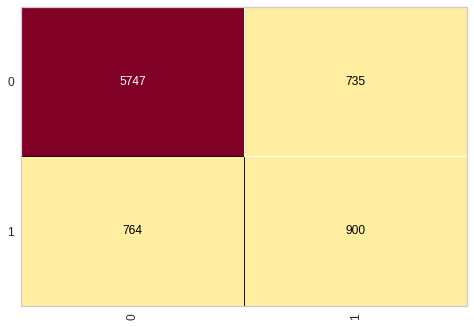

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6482
           1       0.55      0.54      0.55      1664

    accuracy                           0.82      8146
   macro avg       0.72      0.71      0.72      8146
weighted avg       0.81      0.82      0.82      8146



In [ ]:
'''
from sklearn import tree


previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=str(arvore_credit.classes_), filled=True)
fig.savefig('arvore_credit.png')
'''

"\nfrom sklearn import tree\n\n\nprevisores = ['income', 'age', 'loan']\nfig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20, 20))\ntree.plot_tree(arvore_credit, feature_names=previsores, class_names=str(arvore_credit.classes_), filled=True)\nfig.savefig('arvore_credit.png')\n"

In [ ]:
#with open('census.pkl', 'rb') as f:
#  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
arvore_census = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(x_census_teste)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_credit)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

ValueError: ignored

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.8423766265651854

0.8423766265651854

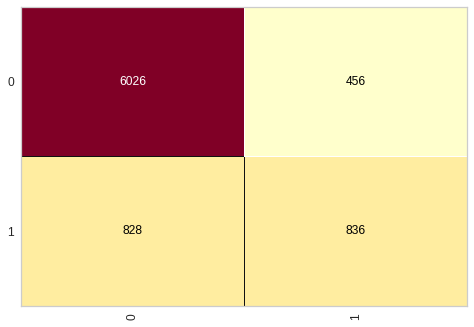

In [ ]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6482
           1       0.65      0.50      0.57      1664

    accuracy                           0.84      8146
   macro avg       0.76      0.72      0.73      8146
weighted avg       0.83      0.84      0.83      8146



In [ ]:
random_forest_census = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

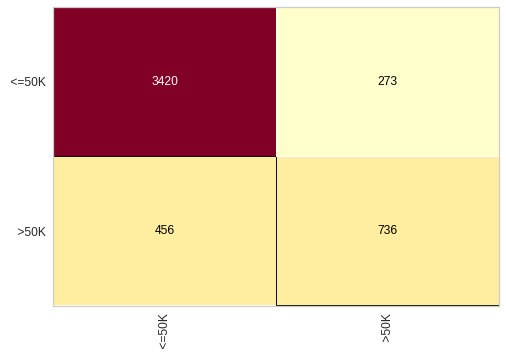

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# Aprendizado Por Regras

In [ ]:
# !pip install Orange3

In [ ]:
import Orange

ModuleNotFoundError: ignored

In [ ]:
base_risco_credito = Orange.data.Table('/content/gdrive/MyDrive/datasets/risco_credito_regras.csv')

In [ ]:
base_risco_credito

In [ ]:
base_risco_credito.domain

In [ ]:
cn2 = Orange.classification.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

In [ ]:
previsao = regras_risco_credito(['boa', 'alta', 'nenhuma', 'acima_35'])
previsao

In [ ]:
base_risco_credito.domain.class_var.values[1]

In [ ]:
base_credit = Orange.data.Table('/content/gdrive/MyDrive/datasets/credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_dividida

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
print(f'A base de treinamento tem o tamanho: {len(base_treinamento)}\nE a base teste tem o tamanho: {len(base_teste)}')

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

# kNN (aprendizado por instâncias)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_credit.fit(x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(x_credit_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.8153695065062607

0.8153695065062607

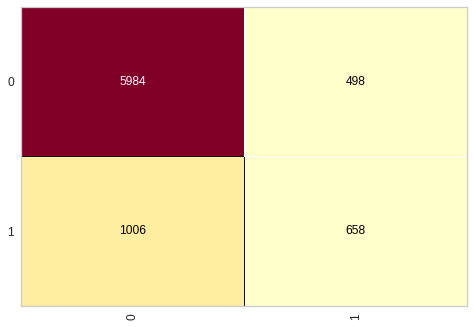

In [ ]:
cm = ConfusionMatrix(knn_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6482
           1       0.57      0.40      0.47      1664

    accuracy                           0.82      8146
   macro avg       0.71      0.66      0.68      8146
weighted avg       0.80      0.82      0.80      8146



In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



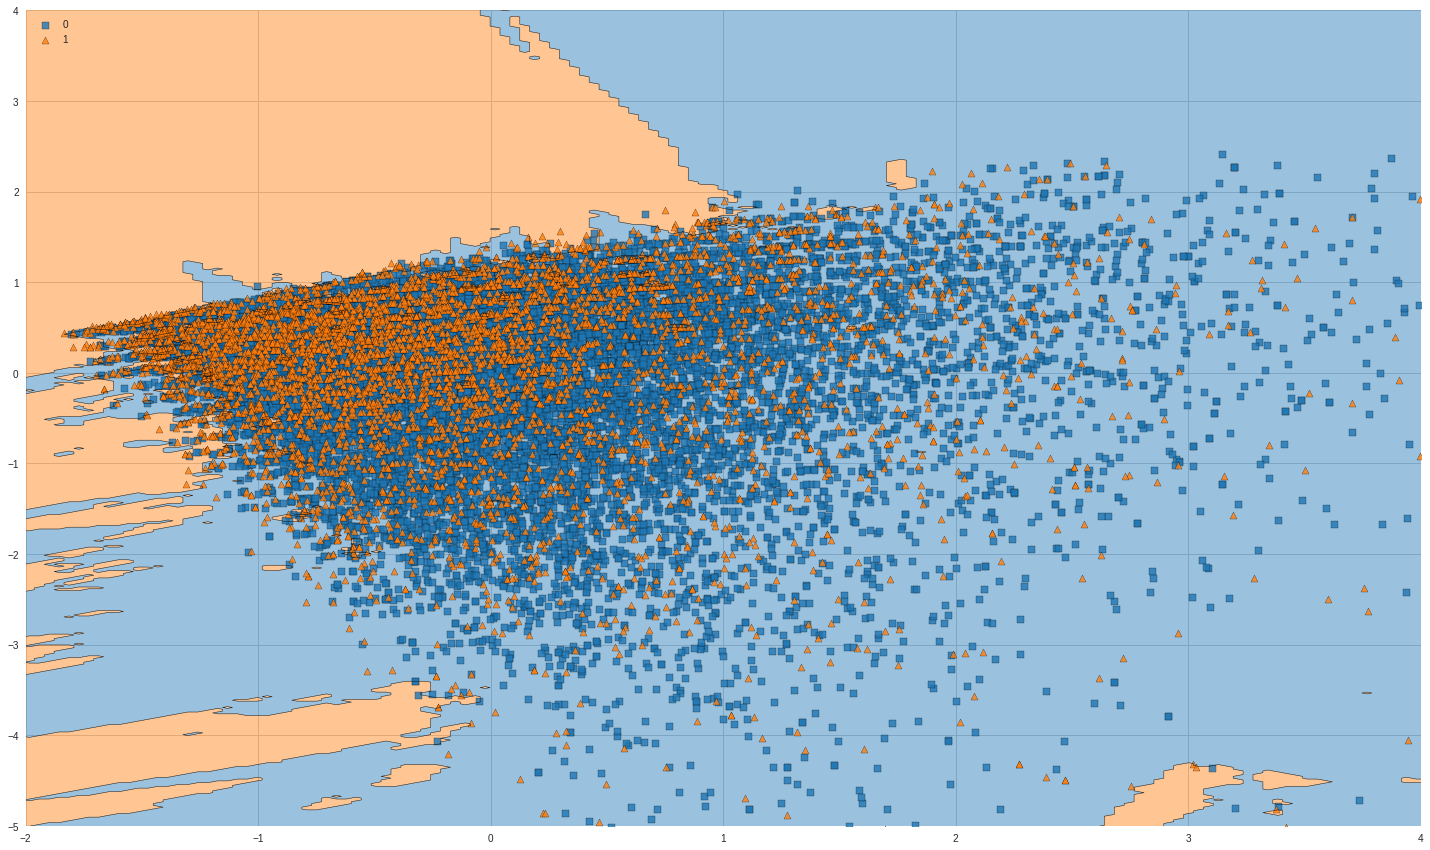

In [ ]:
pca = PCA(n_components = 2)
x_credit2 = pca.fit_transform(x_credit_treinamento)
knn_credit = KNeighborsClassifier(n_neighbors = 20, weights ='uniform', algorithm= 'auto', leaf_size = 14, metric = 'minkowski', p = 2)
knn_credit.fit(x_credit2, y_credit_treinamento)

plt.figure(figsize = (25,15))
plot_decision_regions(np.array(x_credit2), np.array(y_credit_treinamento) , knn_credit, legend = 2)

plt.xlim(-2.0, 4.0)
plt.ylim(-5.0, 4)


plt.show()


In [ ]:
knn_census = KNeighborsClassifier(n_neighbors = 5)
knn_census.fit(x_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = knn_census.predict(x_census_teste)
previsoes

In [ ]:
accuracy_score(y_census_teste, previsoes)

In [ ]:
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = pickle.load(f)

In [ ]:
y_census_treinamento.shape

In [ ]:
#pra visualizar a fronteira de decisão, precisa antes transformar os dados categóricos em numericos
#boa sorte com isso felps do futuro
'''
pca = PCA(n_components = 2)
x_census2 = pca.fit_transform(x_census_treinamento)

knn_census = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_census.fit(x_census2, y_census_treinamento)

plt.figure(figsize = (25,15))
plot_decision_regions(np.array(x_census2), np.array(y_census_treinamento).astype(np.integer) , knn_census, legend = 2)

plt.xlim(-2.0, 4.0)
plt.ylim(-5.0, 4)


plt.show()
'''

# Regressão Logística

In [ ]:
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
#Apagando os registros moderado
x_risco_credito = np.delete(x_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

y_risco_credito

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_risco_credito = LogisticRegression(random_state= 1)
logistic_risco_credito.fit(x_risco_credito, y_risco_credito)

In [ ]:
# b0
logistic_risco_credito.intercept_

In [ ]:
# 4 valores, um para cada atributo previsor
# b1 b2 b3 b4
logistic_risco_credito.coef_

In [ ]:
previsoes1 = logistic_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [ ]:
previsoes1

In [ ]:
logistic_credit = LogisticRegression(random_state= 1)
logistic_credit.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
logistic_credit.intercept_

In [ ]:
logistic_credit.coef_

In [ ]:
previsoes = logistic_credit.predict(x_credit_teste)
previsoes

In [ ]:
accuracy_score(previsoes, y_credit_teste)

In [ ]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

In [ ]:
logistic_census = LogisticRegression(random_state= 1)
logistic_census.fit(x_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = logistic_census.predict(x_census_teste)
previsoes

In [ ]:
accuracy_score(y_census_teste, previsoes)

In [ ]:
cm = ConfusionMatrix(logistic_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_credit = SVC(kernel = 'rbf' , random_state = 1, C = 1.0)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = svm_credit.predict(x_credit_teste)
previsoes

In [ ]:
accuracy_score(y_credit_teste, previsoes)

In [ ]:
cm = ConfusionMatrix(svm_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

In [ ]:
svm_census = SVC(kernel = 'linear', random_state = 1)
svm_census.fit(x_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = svm_census.predict(x_census_teste)
previsoes

In [ ]:
accuracy_score(y_census_teste, previsoes)

In [ ]:
cm = ConfusionMatrix(svm_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Redes Neurais (Multi layer perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, x_credit_teste, y_credit_treinamento,  y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((24435, 3), (24435,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((8146, 3), (8146,))

In [ ]:
rede_neural_credit = MLPClassifier(max_iter = 1000, verbose = True, tol = 0.000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = (15,15,15))
rede_neural_credit.fit(x_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.54049785
Iteration 2, loss = 0.47480495
Iteration 3, loss = 0.45043784
Iteration 4, loss = 0.44253726
Iteration 5, loss = 0.43824597
Iteration 6, loss = 0.43626583
Iteration 7, loss = 0.43411954
Iteration 8, loss = 0.43289624
Iteration 9, loss = 0.43250018
Iteration 10, loss = 0.43158857
Iteration 11, loss = 0.43134087
Iteration 12, loss = 0.43021604
Iteration 13, loss = 0.42987534
Iteration 14, loss = 0.42924066
Iteration 15, loss = 0.42880402
Iteration 16, loss = 0.42883651
Iteration 17, loss = 0.42853376
Iteration 18, loss = 0.42774403
Iteration 19, loss = 0.42761937
Iteration 20, loss = 0.42689837
Iteration 21, loss = 0.42724923
Iteration 22, loss = 0.42676764
Iteration 23, loss = 0.42632485
Iteration 24, loss = 0.42594497
Iteration 25, loss = 0.42573599
Iteration 26, loss = 0.42592408
Iteration 27, loss = 0.42517051
Iteration 28, loss = 0.42485437
Iteration 29, loss = 0.42490311
Iteration 30, loss = 0.42479494
Iteration 31, loss = 0.42453169
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=1000, tol=1e-06,
              verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.8454456174809722

0.8454456174809722

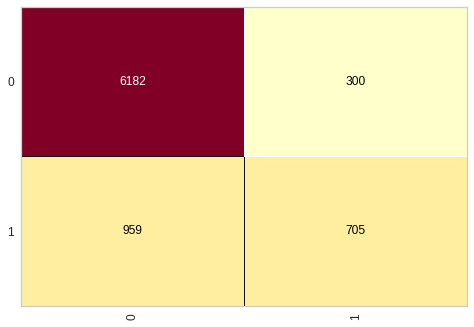

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6482
           1       0.70      0.42      0.53      1664

    accuracy                           0.85      8146
   macro avg       0.78      0.69      0.72      8146
weighted avg       0.83      0.85      0.83      8146



In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, x_census_teste, y_census_treinamento,  y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape,  y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
rede_neural_census = MLPClassifier(max_iter = 1000, verbose = True, tol = 0.000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = (155,155,155))
rede_neural_census.fit(x_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.35983674
Iteration 2, loss = 0.31719403
Iteration 3, loss = 0.30506291
Iteration 4, loss = 0.29634211
Iteration 5, loss = 0.29185034
Iteration 6, loss = 0.28522844
Iteration 7, loss = 0.28076098
Iteration 8, loss = 0.27599719
Iteration 9, loss = 0.27082287
Iteration 10, loss = 0.26465091
Iteration 11, loss = 0.25918542
Iteration 12, loss = 0.25452333
Iteration 13, loss = 0.24954399
Iteration 14, loss = 0.24628833
Iteration 15, loss = 0.24020549
Iteration 16, loss = 0.23497909
Iteration 17, loss = 0.22763699
Iteration 18, loss = 0.22298098
Iteration 19, loss = 0.21832138
Iteration 20, loss = 0.21515016
Iteration 21, loss = 0.20781599
Iteration 22, loss = 0.20348566
Iteration 23, loss = 0.19973452
Iteration 24, loss = 0.19948832
Iteration 25, loss = 0.19044514
Iteration 26, loss = 0.18737786
Iteration 27, loss = 0.18395216
Iteration 28, loss = 0.17946364
Iteration 29, loss = 0.17685637
Iteration 30, loss = 0.17578995
Iteration 31, loss = 0.17317220
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(155, 155, 155), max_iter=1000, tol=1e-06,
              verbose=True)

In [ ]:
previsoes = rede_neural_census.predict(x_census_teste)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8171954964176049

0.8171954964176049

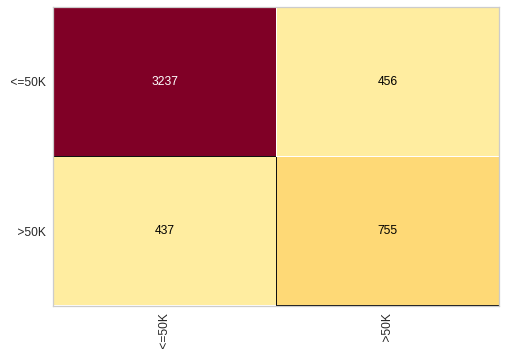

In [ ]:
cm = ConfusionMatrix(rede_neural_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3693
        >50K       0.62      0.63      0.63      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885



# Tuning Hiperparametros

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier  

In [ ]:
with open('/content/gdrive/MyDrive/datasets/credit.pkl', 'rb') as f:
  x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((24435, 3), (24435,))

In [ ]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)

In [ ]:
x_credit.shape

(32581, 3)

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [ ]:
y_credit.shape

(32581,)

Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [i for i in range(2,10, 3)],
              'min_samples_leaf': [i for i in range(1, 10, 3)]
              }

In [ ]:
parametros

{'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 4, 7],
 'min_samples_split': [2, 5, 8],
 'splitter': ['best', 'random']}

In [ ]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

KeyboardInterrupt: ignored

Random Forest

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'n_estimators': [i for i in range(10, 60, 20)],
              'min_samples_split': [i for i in range(2,10, 3)],
              'min_samples_leaf': [i for i in range(1, 10, 3)]
              }

In [ ]:
parametros

In [ ]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

Knn

In [ ]:
parametros = {'n_neighbors': [i for i in range(3,30)],
              'p': [i for i in range(1,7)]}

In [ ]:
parametros

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

Regressão Logística

In [ ]:
'liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs'

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = parametros);
grid_search.fit(x_credit, y_credit);
melhores_parametros = grid_search.best_params_;
melhor_resultado = grid_search.best_score_;



In [ ]:
print(melhores_parametros)
print(melhor_resultado)

SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.01],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
parametros

In [ ]:
'''
grid_search = GridSearchCV(estimator = SVC(), param_grid = parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)
'''

Redes Neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tanh'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
parametros = {'activation': ['relu'],
              'solver': ['adam'],
              'batch_size': [10]}

In [ ]:
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid = parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

# Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_redes_neurais = []

for i in range(5):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

  arvore = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 5, splitter = 'best')
  scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 10)
  scores = cross_val_score(random_forest, x_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, x_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, x_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())
  '''
  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, x_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())
  '''
  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, x_credit, y_credit, cv = kfold)
  resultados_redes_neurais.append(scores.mean())

KeyboardInterrupt: ignored

In [ ]:
resultados = pd.DataFrame({'Arvore':resultados_arvore,
                           'Random Forest': resultados_random_forest,
                           'knn': resultados_knn,
                           'logistica': resultados_logistica,
                           'rede neural': resultados_redes_neurais})

In [ ]:
resultados.describe()

In [ ]:
# Coeficiente de Variação

(resultados.std() / resultados.mean()) * 100

# Teste de Normalidade

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_redes_neurais)

ValueError: ignored

In [ ]:
geral_results = [resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_redes_neurais]
results_names = ['resultados_arvore', 'resultados_random_forest', 'resultados_knn', 'resultados_logistica', 'resultados_redes_neurais']
for i in range(len(geral_results)):
  sns.displot(geral_results[i], kind = 'kde').set(title=results_names[i]);  

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_redes_neurais)
p

In [ ]:
alpha = 0.01

if p <= alpha:
  print(f'Hipótese nula H0 rejeitada, o p-value é: {p:.3}')
  print('Os dados são diferentes')
  print('Hipótese alternativa H1 aceita')
else:
  print(f'Hipótese nula aceita, o p-value é: {p:.3}')
  print('Hipótese alternativa rejeitada, os resultados são iguais')
  print('Não exite diferença estatística')

In [ ]:
geral_results = [resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_redes_neurais]
results_names = ['arvore', 'random_forest', 'knn', 'logistica', 'redes_neurais']

resultados_df = pd.DataFrame(columns = ['accuracy', 'algoritmo'])

for i in range(len(geral_results)):
  for k in geral_results[i]:
    
    resultados_i = pd.DataFrame(data = [[k,results_names[i]]], columns = ['accuracy', 'algoritmo'])
    
    resultados_df = resultados_df.append(resultados_i)

resultados_df

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

In [ ]:
resultados.mean()
#como temos o valor true, nas colunas, rejeitamos a hipótese nula de que os dados são iguais
#aceitamos a hipótese de que os dados são diferentes
#com exceção da ultima comparação de random_forest e redes neurais
# as redes neurais são estatisticamente diferentes de todos os outros algortmos exceto por random forest
#sendo a accuracy das redes neurais maior, devemos escolher ela como o melhor algoritmo

In [ ]:
teste_estatistico.plot_simultaneous()

# Salvando Modelos

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 25, p = 3)
knn.fit(x_credit, y_credit)

KNeighborsClassifier(n_neighbors=25, p=3)

In [ ]:
pickle.dump(knn, open('knn_credit_treinado.sav', 'wb'))

In [ ]:
random_forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 8, n_estimators = 50)
random_forest.fit(x_credit, y_credit)

RandomForestClassifier(min_samples_split=8, n_estimators=50)

In [ ]:
pickle.dump(random_forest, open('random_forest_credit_treinado.sav', 'wb'))

In [ ]:
rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
rede_neural.fit(x_credit, y_credit)

MLPClassifier(batch_size=56)

In [ ]:
pickle.dump(rede_neural, open('rede_neural_credit_treinada.sav', 'wb'))

# Carregando modelos salvos

In [ ]:
rede_treinada = pickle.load(open('rede_neural_credit_treinada.sav', 'rb'))

In [ ]:
knn_treinado = pickle.load(open('knn_credit_treinado.sav', 'rb'))

In [ ]:
random_forest_treinado = pickle.load(open('random_forest_credit_treinado.sav', 'rb'))

In [ ]:
novo_registro = x_credit[np.random.randint(0, len(x_credit))]
novo_registro = novo_registro.reshape(1,-1)
novo_registro

array([[ 0.06332711, -0.11573087, -0.64684875]])

In [ ]:
rede_treinada.predict(novo_registro)[0], knn_treinado.predict(novo_registro)[0], random_forest_treinado.predict(novo_registro)[0]

(0, 0, 0)

In [ ]:
def ensemble_learning(data):
    #return rede_treinada.predict(data)[0], knn_treinado.predict(data)[0], random_forest_treinado.predict(data)[0]
    choices = rede_treinada.predict(data)[0] + knn_treinado.predict(data)[0] + random_forest_treinado.predict(data)[0]
    if choices > 1:
      return 1
    else:
      return 0

In [ ]:
ensemble_learning(novo_registro)

0

In [ ]:
for i in range(10):
  novo_registro = x_credit[np.random.randint(0, len(x_credit))]
  novo_registro = novo_registro.reshape(1,-1)
  print(ensemble_learning(novo_registro))

In [ ]:
novo_registro = x_credit[np.random.randint(0, len(x_credit))]
novo_registro = novo_registro.reshape(1,-1)
novo_registro

array([[-0.20933196, -0.27690634,  0.53948663]])

In [ ]:
rede_treinada.predict(novo_registro)[0]

0

In [ ]:
rede_treinada.predict_proba(novo_registro)[0]
#[prob_classe_0, prob_classe_1]

array([0.77363487, 0.22636513])

In [ ]:
confianca_rede_neural = rede_treinada.predict_proba(novo_registro)[0].max()
confianca_rede_neural

0.7736348740617385

# Regressão Linear

In [191]:
base_plano_saude = pd.read_csv('/content/gdrive/MyDrive/datasets/plano_saude.csv')

In [192]:
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [193]:
x_plano_saude = base_plano_saude.iloc[:,0].values

In [194]:
x_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [195]:
y_plano_saude = base_plano_saude.iloc[:,1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [196]:
np.corrcoef(x_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [197]:
x_plano_saude = x_plano_saude.reshape(-1,1)
x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)

LinearRegression()

In [200]:
# y = b0 + (b1 * x1)
# ----> b0
regressor_plano_saude.intercept_

-558.9490909090912

In [201]:
# ----> b1
regressor_plano_saude.coef_

array([61.86787879])

In [202]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [203]:
grafico = px.scatter(x = x_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = x_plano_saude.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [204]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [205]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [206]:
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

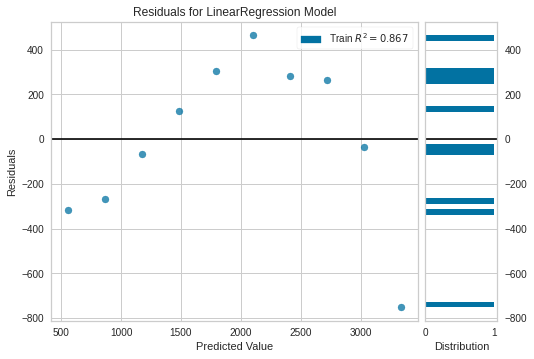

In [207]:
from yellowbrick.regressor import ResidualsPlot
vizualizador = ResidualsPlot(regressor_plano_saude)
vizualizador.fit(x_plano_saude, y_plano_saude)
vizualizador.poof()

##Base Casas

In [209]:
base_casas = pd.read_csv('/content/gdrive/MyDrive/datasets/house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [210]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [211]:
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


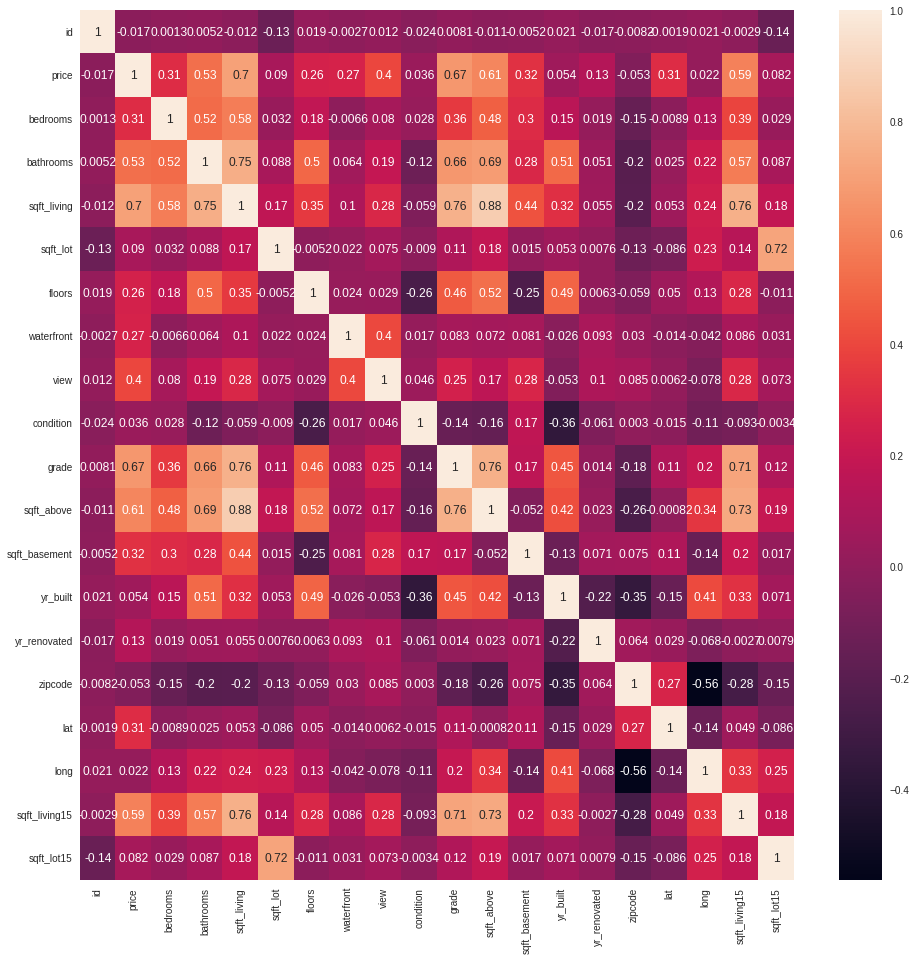

In [212]:
plt.figure(figsize = (16, 16))
sns.heatmap(base_casas.corr(), annot = True)